#read data first version

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle
import random
import json
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import math
import cv2
from google.colab.patches import cv2_imshow
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/MSc/
# %mkdir SCLAD
%cd SCLAD

/content/drive/MyDrive/MSc
/content/drive/MyDrive/MSc/SCLAD


# read data

In [ ]:
sim_all = pd.read_pickle("sim_all.p")

In [ ]:
sim_all = np.array(sim_all)

In [ ]:
sim_all.shape

(8528, 8528)

In [ ]:
items = pd.read_pickle("df_v_t_embedding.p")
items.head(5)

,text,asin,imageURL,embedding_of_text,embedding_of_img
0,magical things really professional amateur mag...,1940280001,[https://images-na.ssl-images-amazon.com/image...,"[-0.5121693, 0.99798703, 0.42178416, 0.1645209...","[-0.16994768, 0.18982676, 0.75423485, 0.432653..."
1,carbon fiber money clip made usa pull extra la...,9654263246,[https://images-na.ssl-images-amazon.com/image...,"[-0.2718411, 0.57745373, -0.5244633, 0.1660285...","[-0.04363831, -0.04609757, 0.7264228, 0.378235..."
2,sterling silver cubic zirconia solitaire ring ...,B00061RFTW,[https://images-na.ssl-images-amazon.com/image...,"[-0.56256497, 0.8782094, -0.5621206, 0.5295459...","[-0.05984018, -0.08105918, 0.62606984, 0.33442..."
3,sterling silver cz marquise cut solitaire cubi...,B00061RG3M,[https://images-na.ssl-images-amazon.com/image...,"[-0.46838546, 0.72800905, -1.0693595, 0.507026...","[-0.07340459, 0.009561129, 0.6598038, 0.374966..."
4,calvin klein mens pack classic vneck tshirt ca...,B00062NHH0,[https://images-na.ssl-images-amazon.com/image...,"[0.12650906, -0.14532308, -0.06045738, 0.48030...","[-0.17253129, -0.22384281, 0.5896789, 0.724949..."


In [ ]:
tweets = []
for line in open('AMAZON_FASHION.json', 'r'):
    tweets.append(json.loads(line))

In [ ]:
td = pd.DataFrame(tweets)

In [ ]:
del tweets

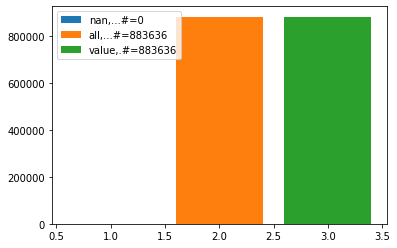

In [ ]:
y = [td.overall.isna().sum(),len(td),len(td)-td.overall.isna().sum()]
plt.bar([1],[y[0]],label='nan,...#='+str(y[0]))
plt.bar([2],[y[1]],label='all,...#='+str(y[1]))
plt.bar([3],[y[2]],label='value,.#='+str(y[2]))
plt.legend()
plt.show()

In [ ]:
td = td[['asin','overall','reviewerID']]

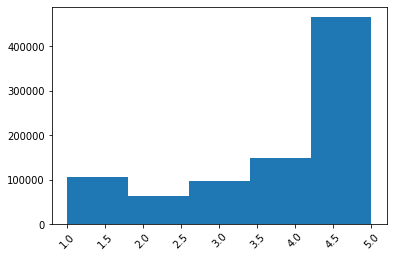

In [ ]:
hist = td['overall'].hist(bins=5,grid=False,xrot=45)

In [ ]:
pos = td[td.overall>2]

In [ ]:
pos.head()

,asin,overall,reviewerID
0,7106116521,5.0,A1D4G1SNUZWQOT
2,7106116521,4.0,A2MWC41EW7XL15
4,7106116521,3.0,A89F3LQADZBS5
5,7106116521,5.0,A29HLOUW0NS0EH
6,7106116521,4.0,A7QS961ROI6E0


In [ ]:
itemasin = list(items.asin)
itemasin
list(pos[2:3].asin)[0]


'7106116521'

In [ ]:
horra = vorra = 0
droplist = []
print(len(pos))
for i in tqdm(range(len(pos))):
    if not list(pos[i:i+1].asin)[0] in itemasin:
        droplist.append(int(list(pos[i:i+1].index)[0]))
    #   pos = pos.drop([int(list(pos[i:i+1].index)[0])])
print(len(pos),len(droplist)) 

In [ ]:
pos = pos.drop(droplist)

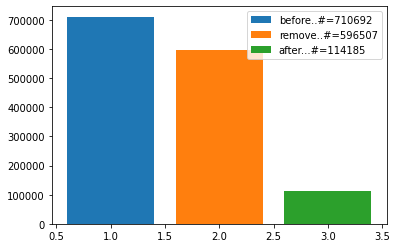

In [ ]:
y = [710692,596507,710692-596507]
plt.bar(1,y[0],label = 'before..#='+str(y[0]))
plt.bar(2,y[1],label = 'remove..#='+str(y[1]))
plt.bar(3,y[2],label = 'after...#='+str(y[2]))
plt.legend()
plt.show()

In [ ]:
pos

,asin,overall,reviewerID
281,B00061RG3M,5.0,A268JWKEP7YLTV
282,B00061RG3M,5.0,A3FPM8WID1Z37I
284,B00061RG3M,3.0,A2ON4AEQZQEPRA
285,B00061RG3M,4.0,A2KIYC58RCHISS
286,B00061RG3M,4.0,A1F3301PAGCLUT
...,...,...,...
883418,B01HIWLG64,5.0,A37HSQY9IDBM3E
883419,B01HIWLG64,3.0,A1T3ON3BDW9YWN
883439,B01HIYPFXC,5.0,A15BJL0812BDQM
883527,B01HJ6HHD0,5.0,A3UDKIP3U57K6R


In [ ]:
neg = {'asin':[],'reviewerID':[]}
neg = pd.DataFrame(neg)
neg

,asin,reviewerID


In [ ]:
pos = pos[['asin','reviewerID']]

In [ ]:
# import pickle
# with open('pos.p', 'wb') as fp:
#     pickle.dump(pos, fp, protocol=pickle.HIGHEST_PROTOCOL)

pos = pd.read_pickle("pos.p")
pos.head(5)

,asin,reviewerID
281,B00061RG3M,A268JWKEP7YLTV
282,B00061RG3M,A3FPM8WID1Z37I
284,B00061RG3M,A2ON4AEQZQEPRA
285,B00061RG3M,A2KIYC58RCHISS
286,B00061RG3M,A1F3301PAGCLUT


In [ ]:
len(pos)

114185

In [ ]:
random.seed(10)

In [ ]:
a = [1,3,2]
a.sort()
a

[1, 2, 3]

In [ ]:
multipos = []
temp = list(pos.asin)
settemp = list(set(temp))
for st in tqdm(settemp):
  count_a = temp.count(st) 
  if count_a > 1:
      multipos.append(st)

len(st),len(settemp)

100%|██████████| 7940/7940 [00:32<00:00, 247.42it/s]


(10, 7940)

In [ ]:
neg = []
c = 0
asinlist = list(items.asin)
for i in tqdm(range(len(pos))):
    sample = pos[i:i+1]
    y = list(sample.reviewerID)[0]
    falseasin = random.choice(asinlist)
    x = np.array([falseasin,list(sample.reviewerID)[0]])
    if((pos == x).all(1).any()):
        falseasin = random.choice(asinlist)
        x = np.array([falseasin,y])
        c+=1
        print("Wow",c)
        
    neg.append(x)   
print(len(neg),neg[:5])

  2%|▏         | 1828/114185 [01:00<1:01:53, 30.26it/s]


KeyboardInterrupt: ignored

# first RS: